In [315]:
#importing the libraries
import pandas as pd
import numpy as np

In [316]:
df= pd.read_csv('survey_results_public.csv')

In [317]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [319]:
#separate the relevant features

features= df[['Country','EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]

features=features.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
features.head(20)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN
5,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, part-time",NaN
6,United States of America,"Secondary school (e.g. American high school, G...",NaN,I prefer not to say,NaN
7,Malaysia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
8,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed part-time,NaN
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0


In [320]:
features= features[features['Salary'].notnull()]
features.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [321]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [322]:
features.describe()

,Salary
count,4.684400e+04
mean,1.184262e+05
std,5.272944e+05
min,1.000000e+00
25%,2.702500e+04
50%,5.621100e+04
75%,1.000000e+05
max,4.524131e+07


In [323]:
features.Salary.value_counts()

150000.0    450
120000.0    430
100000.0    380
64859.0     311
200000.0    308
           ... 
873876.0      1
87800.0       1
17700.0       1
881892.0      1
816816.0      1
Name: Salary, Length: 8735, dtype: int64

In [324]:
features= features.dropna()
features.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [325]:
#we only want entries whose employment is fulltime

features= features[features['Employment'] == 'Employed full-time']
features= features.drop('Employment', axis=1)
features.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


In [326]:
features['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [327]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map
                

In [328]:
country_map= shorten_categories(features.Country.value_counts(), 400)
features['Country']= features['Country'].map(country_map)
features.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

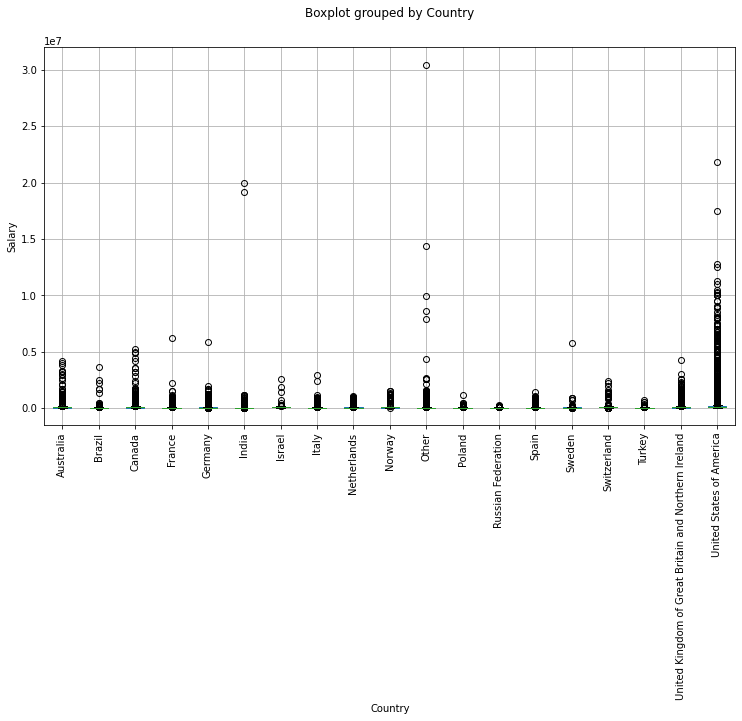

In [329]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1, figsize= (12,7))
features.boxplot('Salary', 'Country', ax=ax)
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [330]:
feaures= features[features['Salary']<= 200000]
features= features[features['Salary']>= 10000]
features= features[features['Country'] != 'Other']

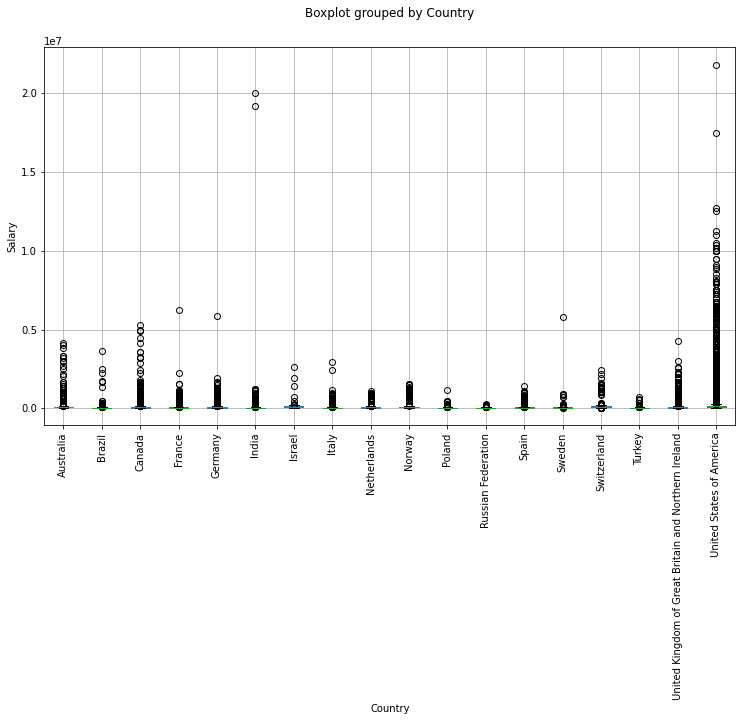

In [331]:
fig, ax= plt.subplots(1,1, figsize= (12,7))
features.boxplot('Salary', 'Country', ax=ax)
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [332]:
features['YearsCodePro'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '35', '30',
       '19', '33', '37', '43', '40', '29', '38', '31', '45', '42', '28',
       '46', '32', '36', '47', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [333]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

features['YearsCodePro']= features['YearsCodePro'].apply(clean_experience) 

In [334]:
features['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [335]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

features['EdLevel']= features['EdLevel'].apply(clean_education)

In [336]:
features['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [337]:
from sklearn.preprocessing import LabelEncoder

le_education= LabelEncoder()

features['EdLevel']= le_education.fit_transform(features['EdLevel'])

features['EdLevel'].unique()

array([2, 0, 1, 3])

In [338]:
le_Country= LabelEncoder()
features['Country']= le_Country.fit_transform(features['Country'])
features['Country'].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [339]:
#splitting the train and test data

X= features.drop('Salary', axis=1)
y= features['Salary']


In [340]:
#split the data into test and train set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [341]:
print(X_train)

       Country  EdLevel  YearsCodePro
14633       10        0           3.0
35719       17        2           2.0
25610       17        1          18.0
24575        0        0           4.0
25400        4        2           6.0
...        ...      ...           ...
38552       17        0           5.0
57506        8        0          10.0
28310       17        0           2.0
31020       17        0           9.0
7336        17        0          15.0

[20971 rows x 3 columns]


In [342]:
print(y_train)

14633     36444.0
35719    116000.0
25610    250000.0
24575     44094.0
25400     46704.0
           ...   
38552    115000.0
57506     66156.0
28310    114500.0
31020    185000.0
7336     160000.0
Name: Salary, Length: 20971, dtype: float64


In [343]:
print(y_test)

22695     19728.0
58677    500000.0
9260      91128.0
79856     16860.0
48196     86316.0
           ...   
42689     81319.0
66322    100000.0
34966     78000.0
37602     16488.0
21693     86976.0
Name: Salary, Length: 6991, dtype: float64


# modelling

### 1. Linear Regression

In [357]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [358]:
y_preds= linear_reg.predict(X_train)
y_preds

array([142262.84944612, 183431.83848115, 234432.42153811, ...,
       206074.99265307, 223434.55776538, 238314.18500451])

In [363]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error= np.sqrt(mean_squared_error(y_train,y_preds))
print("${:,.02f}".format(error))

$556,988.53


### 2. Decision Tree

In [364]:
from sklearn.tree import DecisionTreeRegressor
Dec_Tree= DecisionTreeRegressor(random_state=0)


In [365]:
Dec_Tree.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [366]:
y_preds2= Dec_Tree.predict(X)
y_preds2

array([ 55041.34782609, 108746.36363636,  80556.3       , ...,
       168534.18691589,  83662.07352941,  19472.        ])

In [367]:
error= np.sqrt(mean_squared_error(y,y_preds2))
print("${:,.02f}".format(error))

$536,726.70


### 3. Random Forest

In [368]:
from sklearn.ensemble import RandomForestRegressor
ran_forest= RandomForestRegressor(random_state=0)

#fitting the model
ran_forest.fit(X,y)

RandomForestRegressor(random_state=0)

In [369]:
y_preds3= ran_forest.predict(X)
y_preds3

array([ 55218.80451735, 108971.20404945,  80409.77445041, ...,
       161378.85700716,  83828.90595985,  19231.45774892])

In [370]:
error= np.sqrt(mean_squared_error(y,y_preds3))
print("${:,.02f}".format(error))

$536,845.30


In [372]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [373]:
regressor = gs.best_estimator_

regressor.fit(X, y)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$543,520.80


In [374]:
print(X)

       Country  EdLevel  YearsCodePro
9           13        2           4.0
11          12        0           5.0
12           4        2           6.0
16          15        0           2.0
17           2        0           6.0
...        ...      ...           ...
83432        2        0           0.5
83434       17        0           5.0
83436       17        1           4.0
83437        2        0           3.0
83438        1        3           4.0

[27962 rows x 3 columns]


In [375]:
import pickle

In [392]:
data = {"model": regressor, "le_Country": le_Country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [393]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor = data["model"]
le_Country = data["le_Country"]
le_education = data["le_education"]


In [394]:
y_predd= regressor.predict(X)
y_predd

array([ 78940.13449662,  78940.13449662,  78940.13449662, ...,
       236037.4019301 ,  78940.13449662,  78940.13449662])